# Nettoyage des valeurs non significatives

In [2]:
import pandas as pd
import numpy as np

In [3]:
ma_dict = ({'banane' : [10, 20], 'ananas': [23, 16], 'pomme' : [35, 50]})

In [4]:
fruits = pd.DataFrame.from_dict(ma_dict, orient = 'index')

In [5]:
fruits

,0,1
banane,10,20
ananas,23,16
pomme,35,50


In [6]:
fr2 =  pd.DataFrame.from_dict(ma_dict, orient = 'index')

In [7]:
frame = [fruits,fr2]

In [8]:
fruits = pd.concat(frame)

In [9]:
fruits

,0,1
banane,10,20
ananas,23,16
pomme,35,50
banane,10,20
ananas,23,16
pomme,35,50


###  Détection des lignes dupliquées avec pandas

In [10]:
fruits.duplicated()

banane    False
ananas    False
pomme     False
banane     True
ananas     True
pomme      True
dtype: bool

In [11]:
fruits.drop_duplicates(inplace= True)

In [12]:
fruits

,0,1
banane,10,20
ananas,23,16
pomme,35,50


### Génération d'une regression

In [171]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=20, n_features=4,n_informative = 2,  noise=3, random_state=42)

In [14]:
X.shape

(20, 4)

In [15]:
list(zip(X.flat, y))

[(0.11092258970986608, -48.23041762248722),
 (-1.1509935774223028, -81.34100869867015),
 (-0.5443827245251827, -50.57710158219891),
 (0.37569801834567196, -0.8158567825974703),
 (0.3142473325952739, -31.507801841574196),
 (-0.9080240755212109, -28.6426383127758),
 (-1.0128311203344238, 107.56746992868294),
 (-1.4123037013352915, -13.941901556315575),
 (0.6116762888408679, 16.034777640238858),
 (1.030999522495951, -47.33341554260981),
 (-0.6769220003059587, 46.06697178891597),
 (0.9312801191161986, -27.242176285645005),
 (-0.29900735046586746, -27.301641745729718),
 (0.0917607765355023, -60.24385000345572),
 (0.08704706823817122, 128.37519412767696),
 (-1.9875689146008928, 69.1866698125634),
 (0.5425600435859647, -82.98463225525909),
 (-0.46341769281246226, -153.11384211685123),
 (-0.4694743859349521, -26.991358741246103),
 (-0.46572975357025687, 31.507787053024916)]

In [172]:
data = pd.DataFrame(X, columns=['x1', 'x2', 'x3', 'x4'])

In [168]:
data['y'] = y


In [173]:
data.insert(4, 'x5', 0.2)

### Utilisation de la méthode nunique de pandas pour compter les valeurs differentes

In [176]:
data.head()

,x1,x2,x3,x4,x5
0,0.110923,-1.150994,-0.544383,0.375698,0.2
1,0.314247,-0.908024,-1.012831,-1.412304,0.2
2,0.611676,1.031000,-0.676922,0.931280,0.2
3,-0.299007,0.091761,0.087047,-1.987569,0.2
4,0.542560,-0.463418,-0.469474,-0.465730,0.2


In [177]:
data.nunique()

x1    20
x2    20
x3    20
x4    20
x5     1
dtype: int64

In [21]:
data.drop('x5',axis = 1,  inplace = True)

In [22]:
data.nunique()

x1    20
x2    20
x3    20
x4    20
y     20
dtype: int64

### Utilisation de sklearn pour supprimer des colonnes à faible variance 

In [174]:
from sklearn.feature_selection import VarianceThreshold
from sklearn import set_config
# nouveau dans sklearn sortie vers Pandas
#set_config(transform_output = "pandas")
print('format avant:', data.shape)
variance = VarianceThreshold().set_output(transform= 'pandas')
dt2 = variance.fit_transform(data.iloc[:,:4])
print('format avant:',dt2.shape)

format avant: (20, 5)
format avant: (20, 4)


In [163]:
dt2

,x1,x2,x3,x4
0,0.110923,-1.150994,-0.544383,0.375698
1,0.314247,-0.908024,-1.012831,-1.412304
2,0.611676,1.031000,-0.676922,0.931280
3,-0.299007,0.091761,0.087047,-1.987569
4,0.542560,-0.463418,-0.469474,-0.465730
5,-0.234137,1.579213,-0.234153,0.767435
6,1.356240,-0.072010,0.812526,1.003533
7,-1.763040,0.324084,0.343618,-0.385082
8,-0.645120,0.361396,0.361636,1.538037
9,-0.185659,-1.106335,-0.479174,-1.196207


In [164]:
dt2.corr()

,x1,x2,x3,x4
x1,1.000000,-0.069383,-0.061018,0.187568
x2,-0.069383,1.000000,0.109416,0.113099
x3,-0.061018,0.109416,1.000000,-0.177433
x4,0.187568,0.113099,-0.177433,1.000000


##  Connaitre la version de sklearn

In [29]:
import sklearn
print(sklearn.__version__)

1.2.2


## Creation d'une regression avec une forte dispersion 


In [70]:
X, y = make_regression(n_samples=40, n_features=1,n_informative = 1,  noise=20, random_state=42)

dt1 = pd.DataFrame(X, columns =['X'])
print(dt1.shape)
print(y.shape)
dt2 = pd.DataFrame(y, columns =['y'])
print(dt2.shape)

frame = [dt1, dt2]
dt3 = pd.concat(frame, ignore_index=True,axis= 1)
dt3.head()
dt3.sort_values([0], inplace = True)

(40, 1)
(40,)
(40, 1)


In [60]:
import matplotlib.pyplot as plt

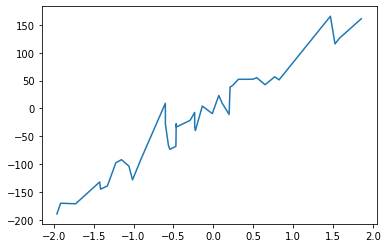

In [72]:
plt.plot(dt3[0], dt3[1])

In [156]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor()
yhat = lof.fit_predict(dt3[[0]])

In [157]:
yhat


array([-1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1, -1, -1])

In [158]:
X_sel= dt3[[0]][yhat == 1]
print(X_sel.shape)
print(y_sel.shape)
y_sel = dt3[[1]][yhat == 1]
dt4 = pd.concat([X_sel, y_sel],axis= 1 )
dt4.sort_values([0], inplace = True)

(34, 1)
(34, 1)


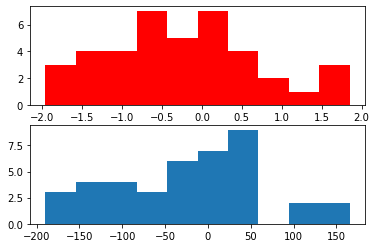

In [159]:
plt.subplot(211)
plt.hist(dt3[0], color='red')
plt.subplot(212)
plt.hist(dt3[1])
plt.show()                


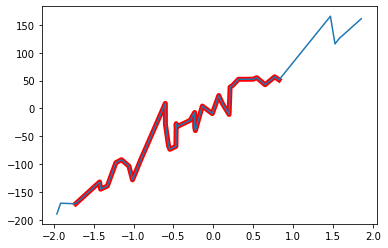

In [160]:
plt.plot(dt4[0] , dt4[1], color ='red', linewidth = '5')
plt.plot(dt3[0], dt3[1])

In [106]:
print(dt3.describe())

               0           1
count  40.000000   40.000000
mean   -0.218637  -20.587324
std     0.952809   89.927190
min    -1.959670 -189.626596
25%    -0.934226  -91.731270
50%    -0.234145  -16.166134
75%     0.329610   44.807304
max     1.852278  165.701378


In [119]:
std1 = dt3[1].std() * 2

In [120]:
borne_inf = dt3[1].mean() - std1
borne_sup = dt3[1].mean()  + std1

In [124]:
dt3[dt3[1] > borne_sup]

,0,1
27,1.465649,165.701378
36,1.852278,161.186229


In [126]:
dt3[dt3[1] < borne_inf]

,0,1


In [129]:
quant25 = dt3.quantile(0.25)
print(quant25)

0    -0.934226
1   -91.731270
Name: 0.25, dtype: float64


In [130]:
quant75 = dt3.quantile(0.75)
print(quant75)

0     0.329610
1    44.807304
Name: 0.75, dtype: float64


In [132]:
borne = quant75[0] - quant25[0]
print(borne)

1.2638358407573875


In [143]:
cutoff = borne * 1.2
inf= quant25[0] - cutoff
sup = quant75[0]+ cutoff
print(inf, sup)

-2.450828845633379 1.8462130129417382


In [144]:
out =  [x for  x in dt3[0]  if inf < x < sup ]
print(len(out))

39


In [211]:
ma_dict = ([1,'banane',10, 20], [2,'ananas', 23, 16], [3,'pomme' ,35, 50])

In [212]:
dtp = pd.DataFrame(ma_dict, columns= ['monindex', 'fruit', 'prix1', 'prix2'])

In [213]:
dtp

,monindex,fruit,prix1,prix2
0,1,banane,10,20
1,2,ananas,23,16
2,3,pomme,35,50


In [219]:
dtp.iloc[1].prix1

23

In [220]:
dtp.loc[1, 'prix1']

10

In [217]:
dtp = dtp.set_index('monindex')


In [218]:
dtp

,fruit,prix1,prix2
monindex,,,
1,banane,10,20
2,ananas,23,16
3,pomme,35,50


In [208]:
dtp.iloc[1]

fruit    ananas
Name: 16, dtype: object

In [210]:
dtp.loc[20]

fruit    banane
Name: 20, dtype: object

In [197]:
dtp= dtp.reset_index()

In [198]:
dtp

,prix1,fruit,prix2
0,10,banane,20
1,23,ananas,16
2,35,pomme,50
